In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform as tf
from scipy.signal import medfilt
from skimage.io import imread, imsave
from glob import glob
import pickle
from tqdm import tnrange

In [14]:
suffix = 'DeepCut_resnet101_trackingledsAug13shuffle1_500000.h5'
raw_files = glob('traj_raw/*Track*')
raw_files.sort()
for i in range(len(raw_files)):
    epoch_name = raw_files[i][:-len(suffix)].split('/')[-1]
    dst_files = glob(('4ArmTrack/'+epoch_name+'*'))
    if len(dst_files) == 0:
        print(epoch_name)

In [15]:
dst_files = glob(('4ArmTrack/*.png'))
dst_files.sort()
dst_dict = dict()
for i in range(len(dst_files)):
    if 'frame1' in dst_files[i]:
        epoch_name = dst_files[i][:-11].split('/')[-1]
        dst_dict[epoch_name] = i

In [19]:
all_dsts = pd.read_hdf('./trackfiles/TrackDeepCut_resnet50_4armtrackOct14shuffle1_700000.h5')
for i in tnrange(len(raw_files)):
    epoch_name = raw_files[i][:-len(suffix)].split('/')[-1]
    epoch_ind = dst_dict[epoch_name]
    dst = all_dsts.values[epoch_ind,:].reshape((4,3))[:,0:2]
    src = np.loadtxt('source/source_track.csv',delimiter=',')
    tform = tf.ProjectiveTransform()
    tform.estimate(src, dst)
    try:
        raw_name =glob('traj_raw/'+epoch_name+'*')[0]
        traj_raw = pd.read_hdf(raw_name)
    except Exception:
        traj_raw = pd.read_hdf(raw_name,key='DeepCut_resnet101_trackingledsAug13shuffle1_500000')
        print(raw_name)
    traj_raw_array = traj_raw.values.reshape(-1,2,3)[:,:,0:2].mean(axis=1)
    traj = tform.inverse(traj_raw_array)
    np.savetxt('traj_projected/'+epoch_name+'_projected.csv',traj,delimiter=',')

traj_raw/EE9_09_20180523_10Track.1DeepCut_resnet101_trackingledsAug13shuffle1_500000.h5


In [ ]:
dset = pd.read_hdf('traj_raw/EE9_09_20180523_10Track.1DeepCut_resnet101_trackingledsAug13shuffle1_500000.h5',key='DeepCut_resnet101_trackingledsAug13shuffle1_500000')

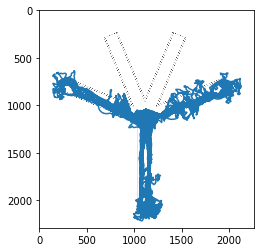

In [38]:
traj_files = glob('traj_projected/*.csv')
traj = np.loadtxt(traj_files[60],delimiter=',')
img = imread('source/Track.png')
plt.imshow(img)
plt.plot(medfilt(traj[:,0],3),medfilt(traj[:,1],3))
plt.show()

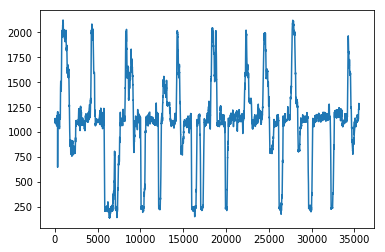

In [40]:
plt.plot(traj[:,0])